In [1765]:
import pandas as pd
import json
import os
import requests
from datetime import datetime, timezone
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import statsmodels.api as sms
from tensorflow.keras.layers import Dropout

In [1766]:
url = "https://merolagani.com/handlers/TechnicalChartHandler.ashx?type=get_advanced_chart&symbol=ALICL&resolution=1D&rangeStartDate=1642411546&rangeEndDate=1770545453&from=&isAdjust=1&currencyCode=NPR"
response = requests.get(url)
data = response.json()


with open("ALICL_Feb.json", "w") as f:
    json.dump(data, f)

In [1767]:
companies = ["/content/ALICL_Feb.json"]

for symbol in companies:
    with open(f"{symbol}", 'r') as f:
        data = json.load(f)
        print(data)
    dates = [datetime.fromtimestamp(ts, tz=timezone.utc).strftime('%Y-%m-%d') for ts in data['t']]
    df=pd.DataFrame({
    "Date":dates,
    "Open":data['o'],
    "Close":data['c'],
    "High":data['h'],
    "Low":data['l'],
    "Volume":data['v']

})
    csv_filename = os.path.basename(symbol).replace('.json', '.csv')
    print(csv_filename)
    df.to_csv(csv_filename,index=False)
    print(f"{csv_filename}Feb_created")

{'t': [1642452300, 1642538700, 1642625100, 1642711500, 1642970700, 1643057100, 1643143500, 1643229900, 1643316300, 1643575500, 1643661900, 1643748300, 1643921100, 1644180300, 1644266700, 1644353100, 1644439500, 1644525900, 1644785100, 1644871500, 1644957900, 1645044300, 1645130700, 1645389900, 1645476300, 1645562700, 1645649100, 1645735500, 1645994700, 1646081100, 1646253900, 1646599500, 1646685900, 1646858700, 1646945100, 1647204300, 1647290700, 1647377100, 1647463500, 1647809100, 1647895500, 1647981900, 1648068300, 1648154700, 1648413900, 1648500300, 1648586700, 1648673100, 1648759500, 1649018700, 1649105100, 1649191500, 1649277900, 1649364300, 1649709900, 1649796300, 1649882700, 1650228300, 1650314700, 1650401100, 1650487500, 1650573900, 1650833100, 1650919500, 1651005900, 1651092300, 1651178700, 1651524300, 1651697100, 1651783500, 1652042700, 1652129100, 1652215500, 1652301900, 1652388300, 1652820300, 1652906700, 1652993100, 1653079500, 1653338700, 1653425100, 1653511500, 165359790

In [1768]:
df = pd.read_csv("ALICL_Feb.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
print(len(df))

942


In [1769]:
df.head()

,Open,Close,High,Low,Volume
Date,,,,,
2022-01-17,575.00,571.75,579.05,564.02,48327.0
2022-01-18,575.00,572.57,579.05,567.28,60928.0
2022-01-19,583.41,567.69,583.41,562.00,29278.0
2022-01-20,568.91,573.37,577.03,559.60,37239.0
2022-01-23,581.09,572.96,586.78,572.68,72785.0


In [1770]:
df.tail()

,Open,Close,High,Low,Volume
Date,,,,,
2026-02-02,481.9,479.0,482.0,475.0,34706.0
2026-02-03,475.0,477.0,482.7,474.3,26671.0
2026-02-04,467.5,474.1,480.5,467.5,25539.0
2026-02-05,483.0,480.0,483.0,475.0,35987.0
2026-02-08,486.0,479.9,489.0,477.3,49511.0


<Axes: xlabel='Date'>

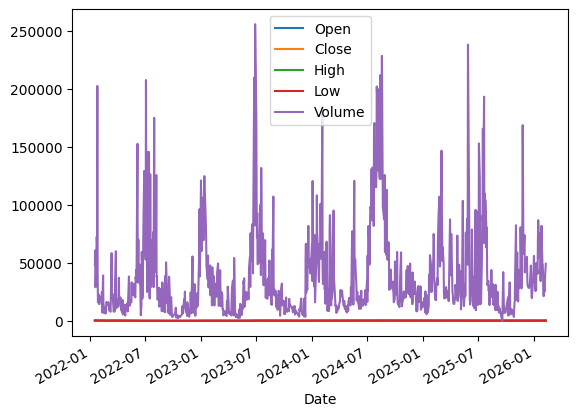

In [1771]:
df.plot()

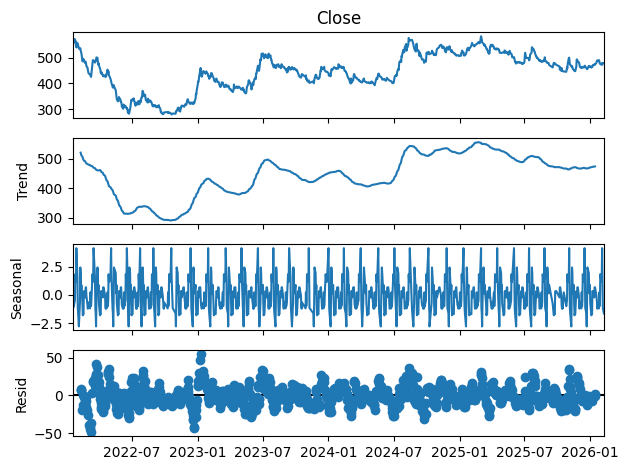

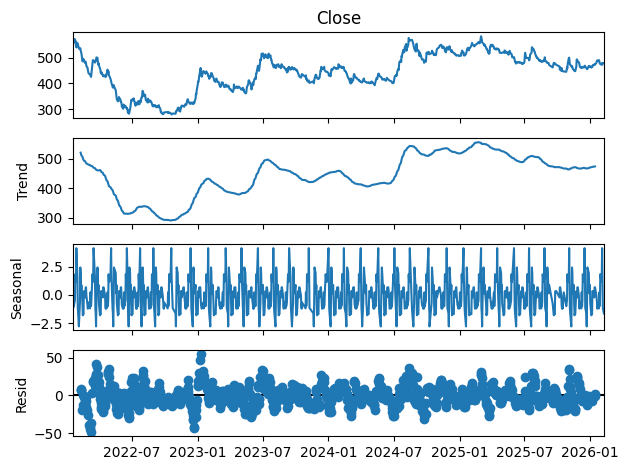

In [1772]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['Close'], model='additive', period=30)
results.plot()

In [1773]:
def plot_graph(figsize, df_to_plot, column_name):
    # df_to_plot is already assumed to have 'Date' as its index
    df_to_plot = df_to_plot.sort_index()

    plt.figure(figsize=figsize)
    plt.plot(df_to_plot.index, df_to_plot[column_name], label=column_name)
    plt.title(f"ASIAN LIFE {column_name} Over Time")
    plt.xlabel("Date")
    plt.ylabel(column_name)
    plt.legend()
    plt.show()

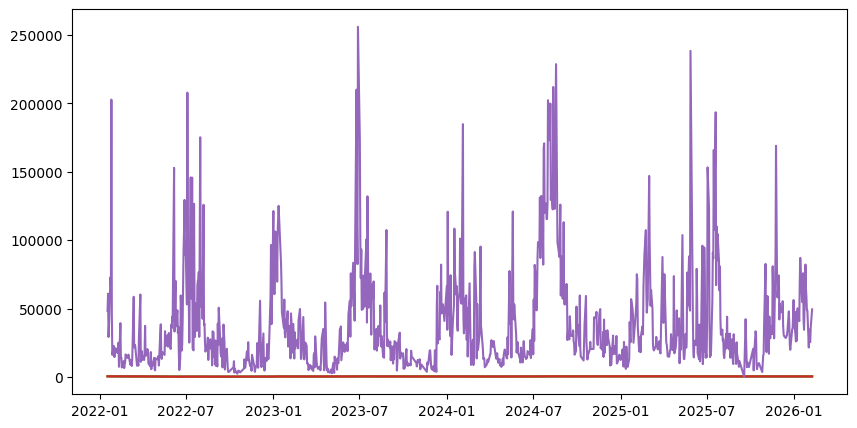

In [1774]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Open'], label='Open Price')
plt.plot(df['Close'], label='Close Price')
plt.plot(df['High'], label='High Price')
plt.plot(df['Low'], label='Low Price')
plt.plot(df['Volume'], label='Volume')


In [1775]:


df['MA_10'] = df['Close'].rolling(10).mean()
df['MA_20'] = df['Close'].rolling(20).mean()


In [1776]:
print(df.isna().sum())

Open       0
Close      0
High       0
Low        0
Volume     0
MA_10      9
MA_20     19
dtype: int64


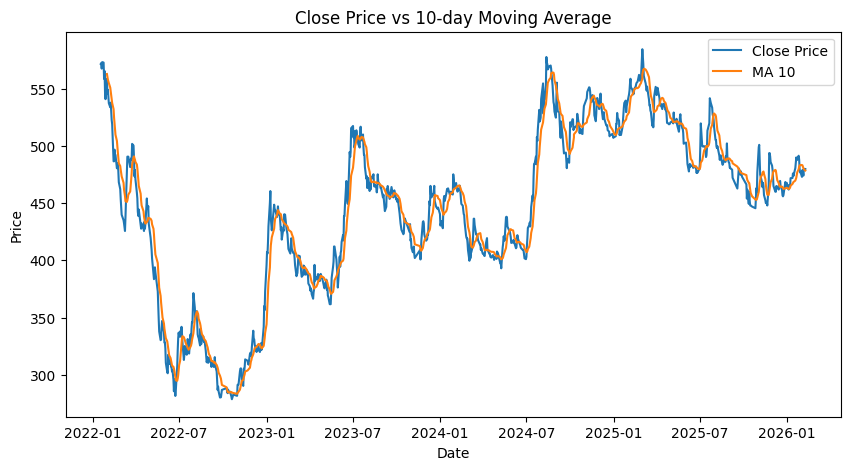

In [1777]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_10'], label='MA 10')
plt.legend()
plt.title("Close Price vs 10-day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


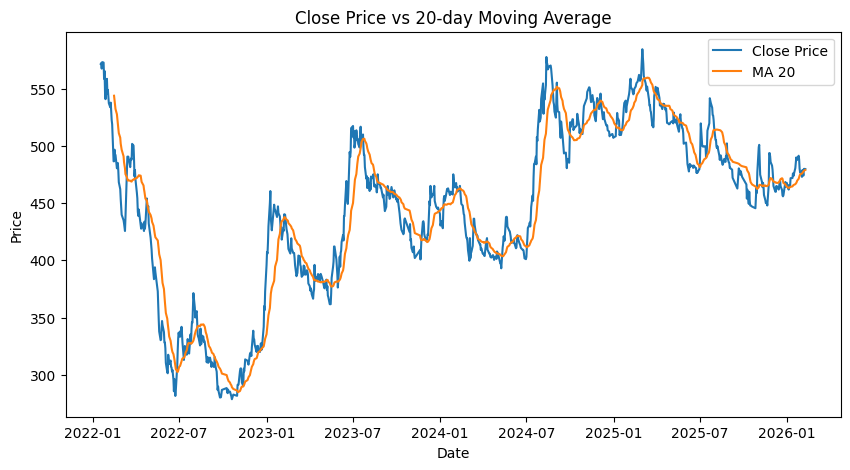

In [1778]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_20'], label='MA 20')
plt.legend()
plt.title("Close Price vs 20-day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [1779]:
len(df)

942

In [1780]:
type(df)

pandas.core.frame.DataFrame

In [1781]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 2022-01-17 to 2026-02-08
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    942 non-null    float64
 1   Close   942 non-null    float64
 2   High    942 non-null    float64
 3   Low     942 non-null    float64
 4   Volume  942 non-null    float64
 5   MA_10   933 non-null    float64
 6   MA_20   923 non-null    float64
dtypes: float64(7)
memory usage: 58.9 KB


In [1782]:
def plot_graph(figsize, df_to_plot, column_name):

    plt.figure(figsize=figsize)
    plt.plot(df_to_plot.index, df_to_plot[column_name], label=column_name)
    plt.title(f"ASIAN LIFE {column_name} Over Time")
    plt.xlabel("Date")
    plt.ylabel(column_name)
    plt.legend()
    plt.show()

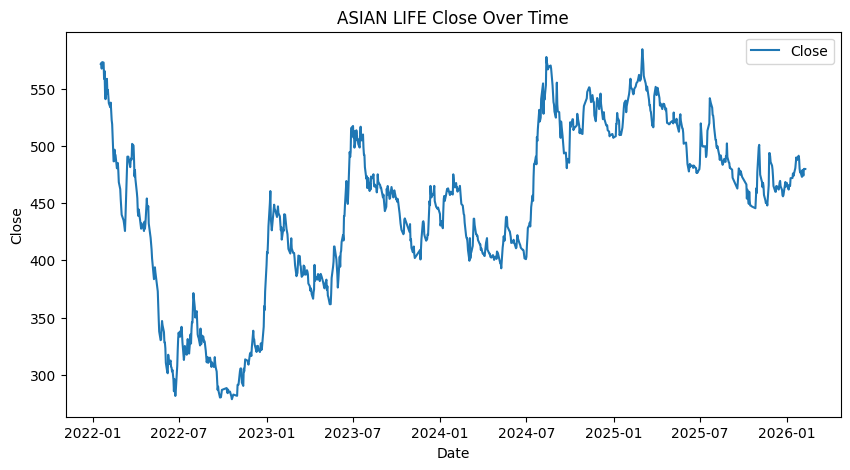

In [1783]:
import matplotlib.pyplot as plt
plot_graph((10, 5), df, "Close")

In [1784]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [1785]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)


In [1786]:
df = df[['Open','High','Low','Close','Volume']].copy()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# stabilize volume
df['Volume'] = np.log1p(df['Volume'])


In [1787]:
features = df[['Open','High','Low','Close','Volume']].values


In [1788]:
window = 60
split = int(len(features) * 0.8)

train_raw = features[:split]
test_raw  = features[split - window:]


In [1789]:
scaler_X = MinMaxScaler()
train_scaled = scaler_X.fit_transform(train_raw)
test_scaled  = scaler_X.transform(test_raw)

scaler_y = MinMaxScaler()
scaler_y.fit(train_raw[:, 3].reshape(-1, 1))


MinMaxScaler()

In [1790]:
def create_sequences(data, window):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(data[i, 3])  # Close
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32).reshape(-1,1)


In [1791]:
X_train, y_train = create_sequences(train_scaled, window)
X_test, y_test   = create_sequences(test_scaled, window)


In [1792]:
model_ohlcv = Sequential([
LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model_ohlcv.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mse')
model_ohlcv.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_45 (LSTM)                  │ (None, 60, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_46 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,129 (469.25 KB)

 Trainable params: 120,129 (469.25 KB)

 Non-trainable params: 0 (0.00 B)

In [1793]:
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = model_ohlcv.fit(
  X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1353 - val_loss: 0.0086
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0152 - val_loss: 0.0054
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0083 - val_loss: 0.0020
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0066 - val_loss: 0.0020
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0055 - val_loss: 0.0019
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0053 - val_loss: 0.0023
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0047 - val_loss: 0.0028
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0041 - val_loss: 0.0019
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0045 - val_loss: 0.0021
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0048 - val_loss: 0.0018
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0041 - val_loss: 0.0020
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

In [1794]:
pred_scaled = model_ohlcv.predict(X_test)

if pred_scaled.ndim == 3:
    pred_scaled = pred_scaled[:, -1, :]

pred = scaler_y.inverse_transform(pred_scaled)
actual = scaler_y.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(actual, pred))
mae = mean_absolute_error(actual, pred)

print("RMSE for ASIAN:", rmse)
print("MAE for  ASIAN:", mae)



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
RMSE for ASIAN: 8.115532156464983
MAE for  ASIAN: 5.771730422973633


In [1795]:
import plotly.graph_objects as go
import numpy as np

actual_flat = actual.flatten()
pred_flat = pred.flatten()

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        y=actual_flat,
        mode="lines",
        name="Actual",
        line=dict(width=2)
    )
)

fig.add_trace(
    go.Scatter(
        y=pred_flat,
        mode="lines",
        name="Predicted",
        line=dict(
            width=2,
            shape="spline"
        )
    )
)

fig.update_layout(
    title="LSTM with OHLCV — Actual vs Predicted For ASIAN LIFE",
    xaxis_title="Time",
    yaxis_title="Price",
    hovermode="x unified",
    template="plotly_white"
)

fig.show()


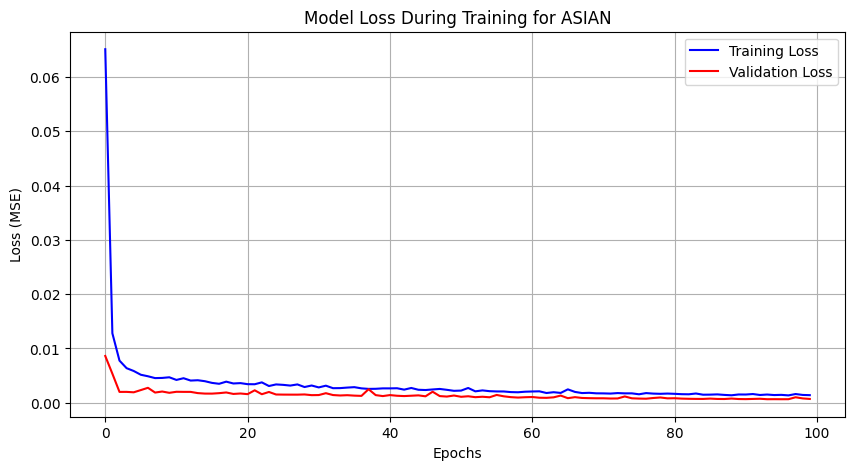

In [1796]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history.get('val_loss', []), label='Validation Loss', color='red')
plt.title('Model Loss During Training for ASIAN')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [1797]:
model_ohlcv.save("model_ohlcv_LSTM_ASIAN_Feb.h5")